Import The Libreries

In [1]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [17]:
plt.style.use("fivethirtyeight")

Get Data

In [18]:
dataSet = pd.read_csv("./AAPL (1).csv",index_col="Date")
data_close = dataSet['Close']
df = data_close.values

Visualize DataFrame


<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

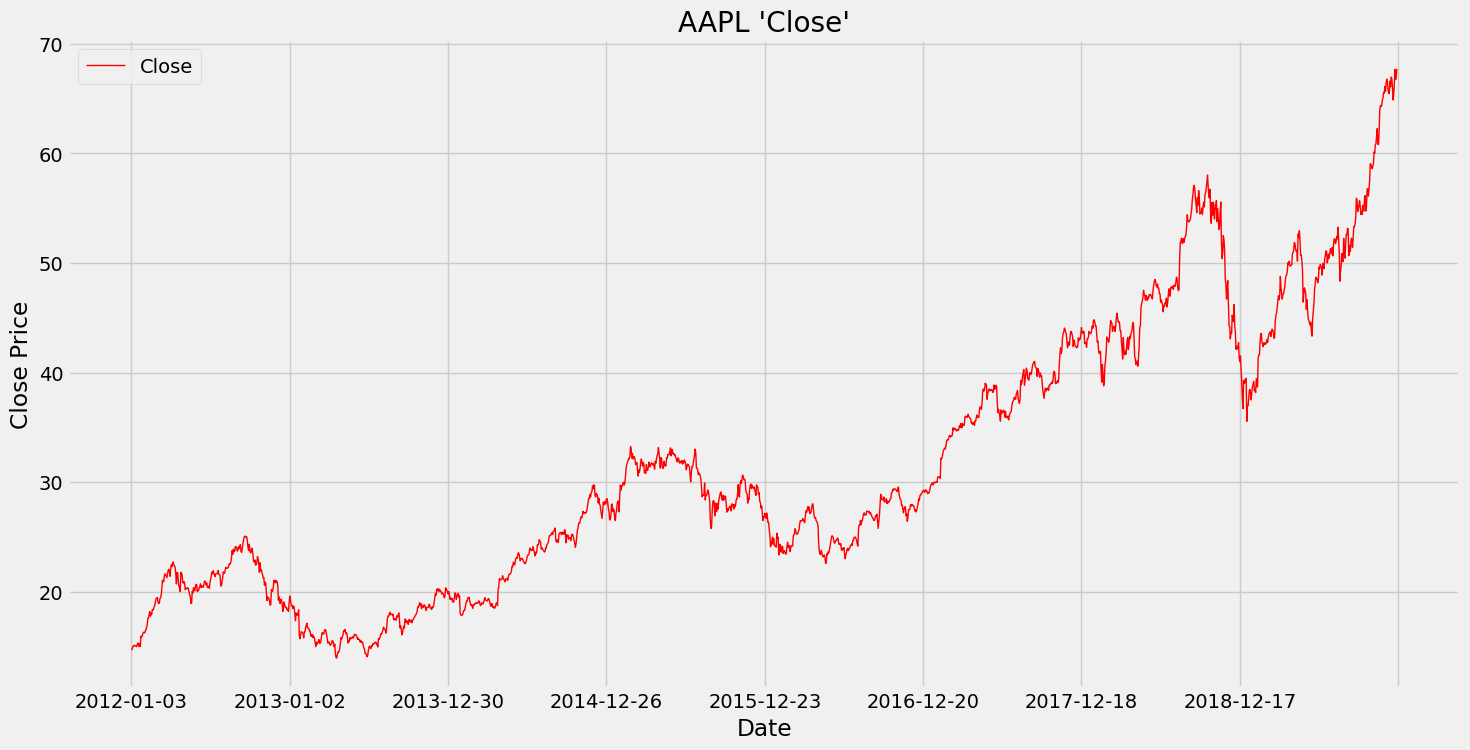

In [23]:
data_close.plot(figsize=(16,8),color="red",xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close Price",linewidth=1)

Get Number of train data


In [5]:
len_data_train = math.ceil(len(df)*.9)


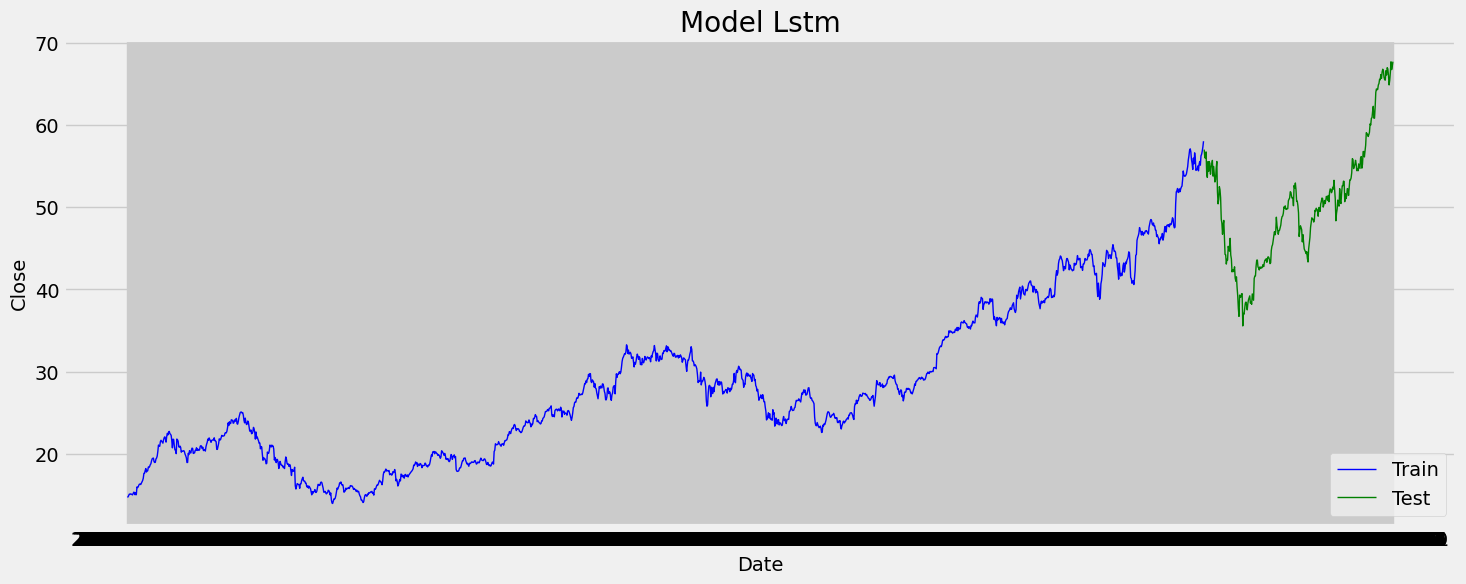

In [25]:
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.title("Model Lstm")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
plt.plot(data_close[:len_data_train],"blue", linewidth=1)
plt.plot(data_close[len_data_train:],"green", linewidth= 1)
plt.legend(["Train", "Test"], loc="lower right")
plt.show()

In [7]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data_close)

Split Data to train & test


In [8]:
# create the training data
train_data = scaler_data[0:len_data_train, :]
# split the train data
x_train = []
y_train = []
for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])

# convert the data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
 # create the data test
test_data = scaler_data[len_data_train-50:, :]

# create x_test & y_test
x_test = []
y_test = df[len_data_train:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Build And Train Lstm Model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
model.fit(x_train, y_train, epochs=1)

52/52 [==============================] - 84s 201ms/step - loss: 0.0071


In [11]:
# Prodection the data values
pred = model.predict(x_test)
prediction = scaler.inverse_transform(pred)


10/10 [==============================] - 6s 60ms/step


Plot Train & Test & Prediction 


C:\Users\Bureau\AppData\Local\Temp\ipykernel_10808\3634435498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediction'] = prediction


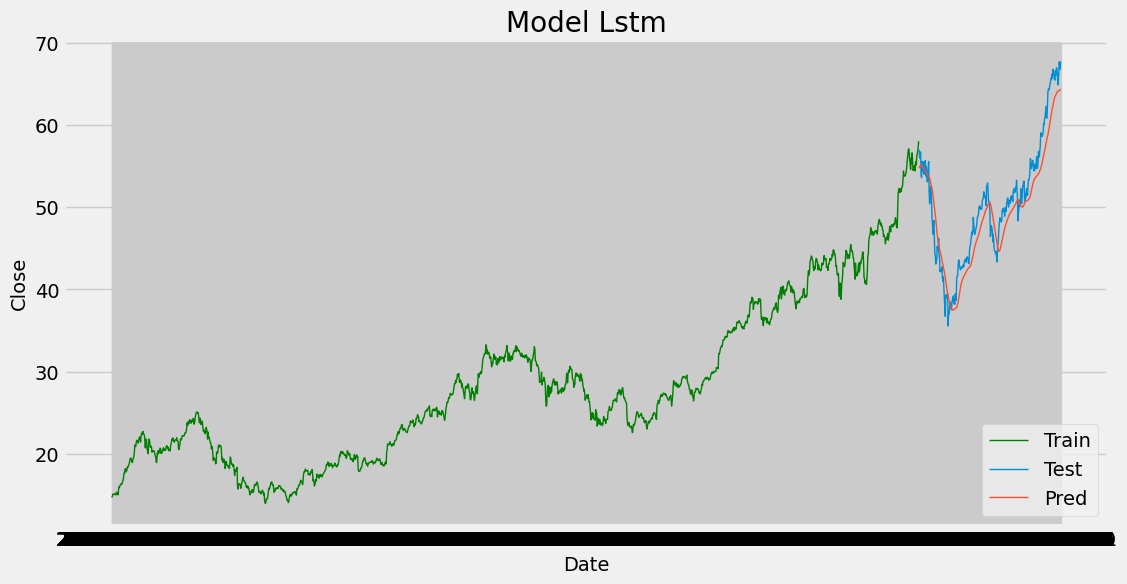

In [12]:
train = data_close[:len_data_train]
actual = data_close[len_data_train:]
actual['Prediction'] = prediction
plt.figure(figsize=(12, 6))
plt.title("Model Lstm")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
plt.plot(train,"green", linewidth=1)
plt.plot(actual[['Close', 'Prediction']], linewidth= 1)
plt.legend(["Train", "Test", "Pred"], loc="lower right")
plt.show()